# Lecture 14

Lesson Objectives:
- Learning how to use SciPy ODE Solvers in Jupyter Notebooks
____

Today's goal is to learn how to use integrated ODE Solvers in Jupyter Notebooks. These ODE solvers are similar to those used many times in Matlab.

All information relating to this lesson can be found in https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html .

There are a few reasons for choosing integrated solvers. Many times, there is error tolerance control via adaptive time stepping. Other times they are coded in such a way to decrease the computing time associated withe solving the ODE. 

At its core, the system is solve an IVP

$$\frac{dy}{dt}=f(t,y),\qquad y(t_{0})=y_{0}$$

___

To solve an ODE in Jupyter with a library, you need to use a function from the SciPy library, known as `scipy.integrate.solve_ivp`. Examining the inputs of `solve_ivp`:

`solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)`

`fun`: the right-hand side of our ODE

`t_span`: the interval of your ODE

`y0`: the initial value

`method`: the numerical ODE method you are using, default is RK45 (we'll talk more about this)

`t_eval`: the time points that are stored in the computed solution. They must fall within the range of `t_span`. If nothing is set, then the points will be chosen by the solver

`dense_output`: when the resulting solutions has many points to output, it may be useful to store as an interpolating polynomial

`events`: (don't worry about this at the moment)

`vectorized` : if the right hand side is vectorized, this should be set to True. Default is False.

`options`: options associated with the ODE solver (we'll discuss this more)


____

The possible numerical ODE methods listed under `methods` are as follows:

`RK45`: Explicit RK method of order 5 (globally 4). This should be the first option.

`RK23`: Explicit RK method of order 3 (globally 2)

`DOP853`: Explicit RK method of order 8. Use for problems needing high precision.

`Radau`: Implicit RK method that is order 5.

`BDF`: Implicit multistep method of variable order.

`LSODA`: A method that automatically uses an Adams method for non-stiff problems and a BDF method for stiff problems.

At first try to run ‘RK45’. If it takes too many iterations, diverges, or fails, your problem is likely to be stiff and you should use ‘Radau’ or ‘BDF’. 

_____

The options listed under `options` are associated with the ODE solver. A few of the more relevant options are the following:

`first_step`: the initial step size

`max_step`: the max step size

`atol,rtol`: solver uses a local error estimate that ensures that the estimate is less than `atol + rtol * abs(y)`, where if the error estimate is above the threshold, a smaller step size is chosen.

____

Let's use this solver for a simple ODE

$$y'=-6y,\qquad y(0)=1$$

using RK45

[ 0.          0.10001999  1.03186487  1.90765136  2.78720278  3.66720722
  4.54883436  5.43428935  6.3287186   7.24349302  8.20147297  9.24208996
 10.        ]
[[1.00000000e+00 9.04819329e-01 3.56604349e-01 1.48607809e-01
  6.16975543e-02 2.56034390e-02 1.06078348e-02 4.37824013e-03
  1.79098363e-03 7.17942810e-04 2.75699274e-04 9.75482058e-05
  4.57231383e-05]]


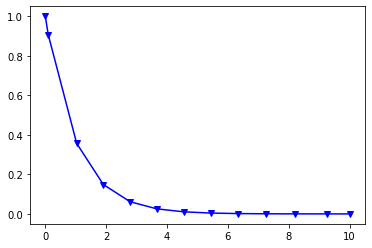

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
def fun1(t,y):
    f=-1*y
    return f

sol=solve_ivp(fun1,[0,10],[1])

print(sol.t)
print(sol.y)
plt.plot(sol.t,sol.y[0,:],'-vb')

Let's say we want more time points. Then we need to include `t_eval` in our solver (and also specify `RK45` as our method)

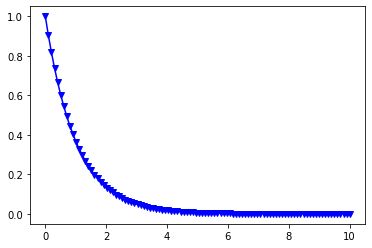

In [26]:
teval=np.linspace(0,10,100)
sol=solve_ivp(fun1,[0,10],[1],'RK45',teval)

plt.plot(sol.t,sol.y[0,:],'-vb')

If we want to run our ODE solver with multiplee initial values, then we can do so with our initial conditions

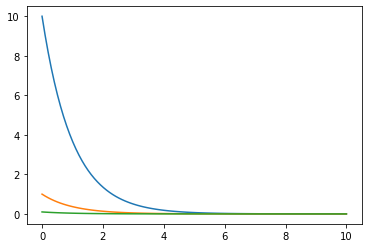

In [27]:

y0=[10,1,.1]
sol=solve_ivp(fun1,[0,10],y0,'RK45',teval)

plt.plot(sol.t,sol.y[0,:],sol.t,sol.y[1,:],sol.t,sol.y[2,:])

We can also set our error tolerances to different levels and our ODE solver will take an appropriate step size. Here we play with `rtol`:

[[1.00000000e+00 7.77875308e-01 1.34723194e-01 2.33332244e-02
  4.04273558e-03 7.00280981e-04 1.44829997e-04]]
[[1.00000000e+00 8.53429379e-01 2.00766244e-01 5.32455087e-02
  1.39675187e-02 3.66630665e-03 9.61033862e-04 2.50689316e-04
  6.42381172e-05 4.99071265e-05]]
[[1.00000000e+00 9.38735592e-01 5.20001081e-01 2.94849076e-01
  1.66860148e-01 9.42828832e-02 5.31259487e-02 2.97920819e-02
  1.65714314e-02 9.09386785e-03 4.88325612e-03 2.53612889e-03
  1.25423814e-03 5.79126097e-04 2.43572749e-04 9.04043906e-05
  4.55040391e-05]]


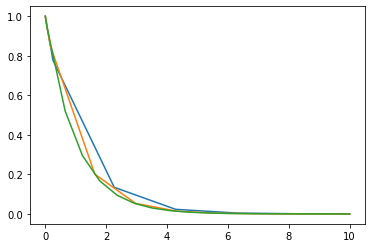

In [3]:
sol1=solve_ivp(fun1,[0,10],[1],'RK45',rtol=.1)
print(sol1.y)
sol2=solve_ivp(fun1,[0,10],[1],'RK45',rtol=.01)
print(sol2.y)
sol3=solve_ivp(fun1,[0,10],[1],'RK45',rtol=.0001)
print(sol3.y)
plt.plot(sol1.t,sol1.y[0,:],sol2.t,sol2.y[0,:],sol3.t,sol3.y[0,:])

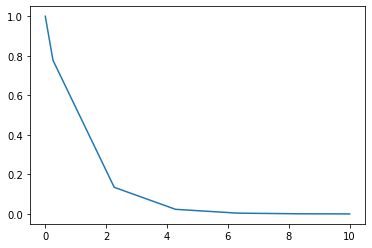

In [4]:
plt.plot(sol1.t,sol1.y[0,:])

____

Let's investigate how to approach systems of ODEs. 

One of the most famous ODEs is the Lotka-Volterra model for Predator-Prey interactions. They were developed in the 1920s in parallel by two mathematicians, Alfred Lotka (USA) and Vito Volterra (Italy).

Let $X$ represent the population of prey. Prey grow exponentially when left to their own devices (assuming infinite carrying capacity in the environment), so $X'=a X$.

If there are predators present, whose population is reresented by $Y$, then the predators cause the prey decline at a rate that is jointly proportional to the population of predators and prey. If no few predators are present, then they cause less of a decline to the prey population. One of our equations becomes 
$$X'= a X - b XY$$

The predators grow at a rate that is also jointly proportional to the number of predators and prey, so $Y'=c XY$. Predators compete with each other, so the more predators present, the more a population declines. Our predator equation then becomes
$$Y'=c XY - d Y$$

Our set of equations are then

$$X'=aX-b XY,\qquad X(0)=X_0$$
$$Y'=c XY - dY,\qquad Y(0)=Y_0$$

Let's explore how to model this with our solver. Note we use two variables, `x,y` stored in a vector `z`. Setting up the function:


In [95]:
def LVEqn(t,z):
    a=1.5
    b=.1
    c=.1
    d=1
    x,y=z
    f1=a*x-b*x*y
    f2=c*x*y-d*y
    return [f1,f2]

Note that our solver uses multiple arguments in the right hand side.

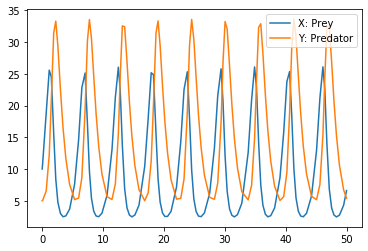

In [98]:
sol = solve_ivp(LVEqn, [0, 50], [10, 5],'RK45',rtol=.0001)

plt.plot(sol.t,sol.y[0,:],sol.t,sol.y[1,:])
plt.legend(['X: Prey','Y: Predator'])

Notice that some of our solutions don't seem that smooth. One reason for this is that the ODE is stiff (rapid changes occur) and can lead to stability issues with our solution. 

Certain solvers have been formulated to deal with these issues. Try `LSODA`.

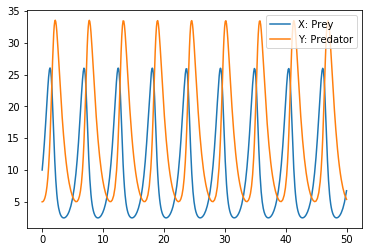

In [103]:
sol = solve_ivp(LVEqn, [0, 50], [10, 5],'LSODA',rtol=.0001)

plt.plot(sol.t,sol.y[0,:],sol.t,sol.y[1,:])
plt.legend(['X: Prey','Y: Predator'])

Before continuing try playing around with parameters of the equation. Note how the solution changes. We can also play around with a phase plot with respect to $X$ and $Y$.

Text(0, 0.5, 'Y Predator')

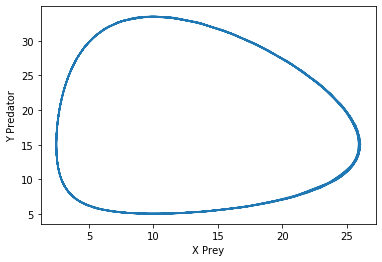

In [104]:
plt.plot(sol.y[0,:],sol.y[1,:])
plt.xlabel('X Prey')
plt.ylabel('Y Predator')


For comparison, here is an image of hare and lynx populations (counted by the number of furs collected by the Hudson Bay Company) over time:

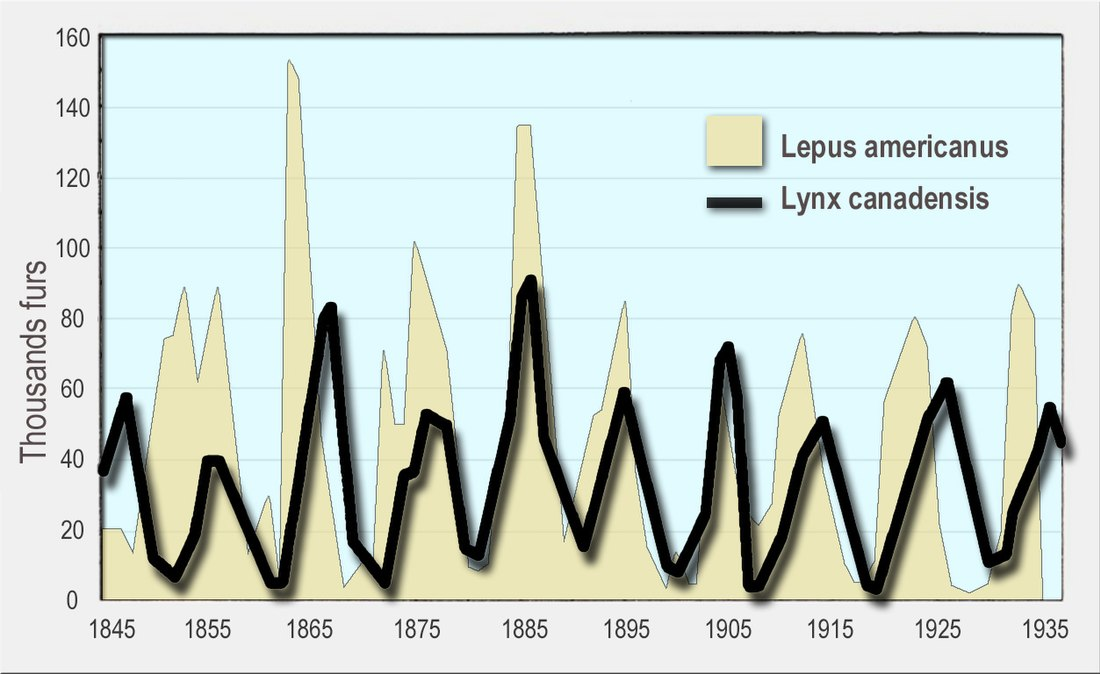

In [109]:
from IPython.display import Image
Image(filename='hare_lynx_population.jpg') 

____
### Stiff Problems

Many times when talking about stability of our methods, we talk about the stiffness of a system of equations. The formal definition of stiffness is a bit vague but generally the idea is asking how small of a timestep do we need to take to have a stable numerical solution.

We saw previously that 

$$y'=\lambda y,\qquad t\in[a,b]$$

required a small time step for Forward Euler generally if $(b-a)Re(\lambda)<<-1$. This is due to the rapid decay of the system. For systmes
$$\mathbf{y}'=\mathbf{f}(\mathbf{y},t)$$
If we examine the Jacobian of the the system
$$J=\frac{\partial \mathbf{f}_i}{\partial \mathbf{y}_j}$$
then we can make the argument that a system is stiff if

$(b-a)\min_{j}(Re(\lambda_{j}))<<-1$

where $\lambda_{j}$ is an eigenvalue of the Jacobian.



____

Let's talk about another ODE used to model infectior diseases. Generally SIR Models are compartmental models that describe three population types: Susceptible $S(t)$;  Infected $I(t)$; Recovered $R(t)$.

Susceptibles will remain susceptible to an infection unless they get infected. Susceptibles lost to infection are dependent on the number of infected people

$$\frac{dS}{dt}=-\alpha S I$$

The number of infected people increases if a susceptible gets infected. But infected people also recover at a certain rate, leading to a loss of the number of infected.

$$\frac{dI}{dt}=\alpha S I -\beta I$$

The number of recovered people depends on the rate of recovery for infected people.

$$\frac{dI}{dt}=\beta I$$

Note that if we assume a fixed population, then
$$\frac{dS}{dt}+\frac{dI}{dt}+\frac{dR}{dt}=0$$

Let's set up a system with five out of one hundred people infected. Let $S(0)=95$ and $I(0)=5$ with $R(0)=0$. Choose an infection rate of $alpha=1$ and a recovery rate of $\beta=5$ and solve over an interval $[0,1]$.


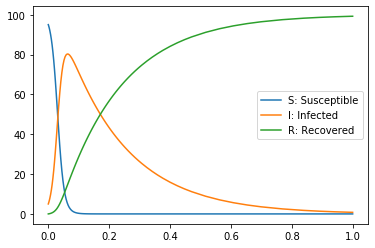

In [108]:
def SIR(t,Z):
    alpha=1
    beta=5
    S,I,R=Z
    f1=-alpha*S*I
    f2=alpha*S*I-beta*I
    f3=beta*I
    return [f1,f2,f3]

sol = solve_ivp(SIR, [0, 1], [95, 5, 0],'LSODA',rtol=.0001)

plt.plot(sol.t,sol.y[0,:],sol.t,sol.y[1,:],sol.t,sol.y[2,:])
plt.legend(['S: Susceptible','I: Infected','R: Recovered'])

Find values of $\alpha$ and $\beta$ that doesn't allow for the disease to spread, or values that wipe everyone out.

____

Chemical Kinetics can be modeled as a system. Let's say we have three chemical species [A], [B], and [C]. The chemical kinetics of the systems are dictated as follows

$$\frac{d[A]}{dt}=-k_{1}[A]$$
$$\frac{d[B]}{dt}=k_{1}[A]-k_{2}[B]$$
$$\frac{d[C]}{dt}=k_{2}[B]$$

Let $[A](0)=[B](0)=[C](0)=0$.

Let $k_1=1$ but vary $k_2=10,100,1000$.

